# Introduction

**GPT-2 Text Generation**

This project demonstrates how to build a text generation pipeline using AI, with a particular focus on the GPT-2 language model. The core of this process involves two key Python components: **the pre-trained GPT-2 small and the HuggingFace library**.

**GPT-2 Models**

The GPT-2 language model is a transformer-based architecture trained to predict the next word in a sequence. These models comes in various sizes, including the small (124M parameters) and medium (355M parameters) versions, each offering different capacities and performance levels. Due to its training on an extensive dataset of 8 million web pages, GPT-2 can handle a diverse range of natural language tasks by simply generating text based on an initial input.

**Decoding Strategies**

The project explores various decoding strategies to control the output of the GPT-2 model. It examines the differences between deterministic methods like Greedy Search and Beam Search, and indeterministic methods such as Random Sampling, Top-K Sampling, and Top-P Sampling. By adjusting parameters in these decoding strategies, it's possible to generate text that is not only coherent but also varied and interesting, overcoming the limitations of simpler approaches.

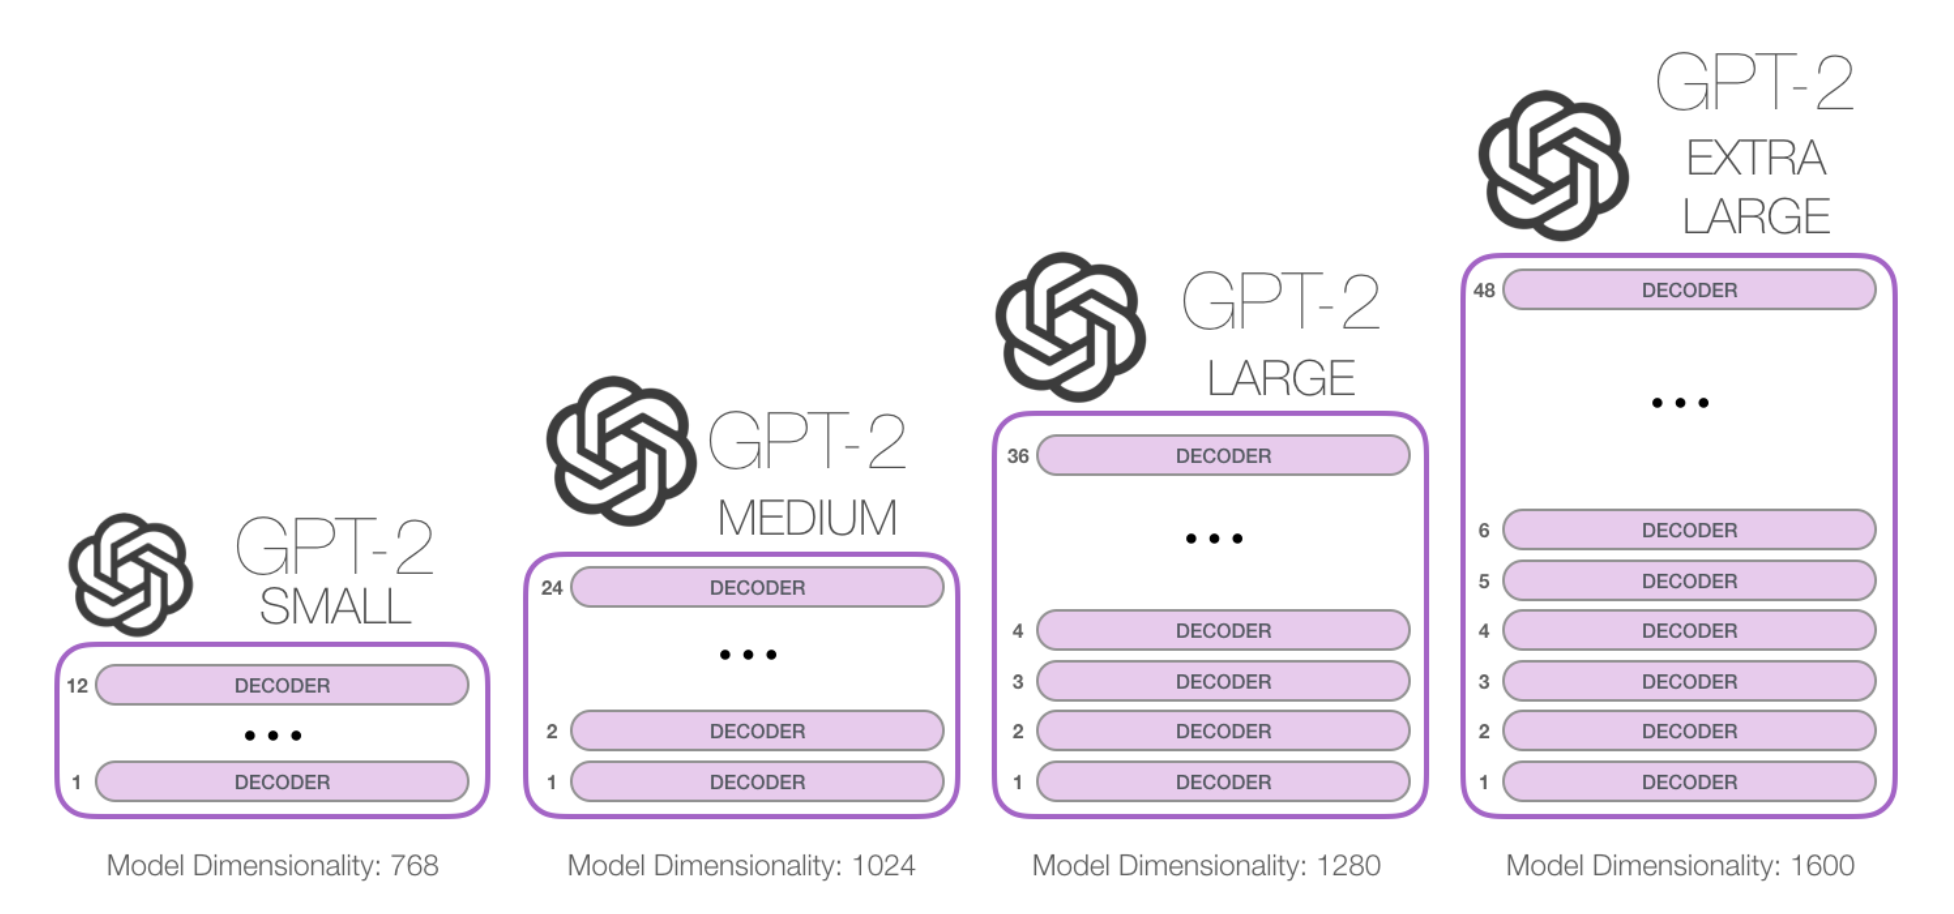

**HuggingFace library**

The HuggingFace library is the second essential component. This robust Python package provides a collection of general-purpose architectures, including BERT and GPT-2, suitable for Natural Language Understanding (NLU) and Natural Language Generation (NLG) tasks. The library simplifies the process of using pre-trained models and their associated tokenizers, enabling seamless text generation.

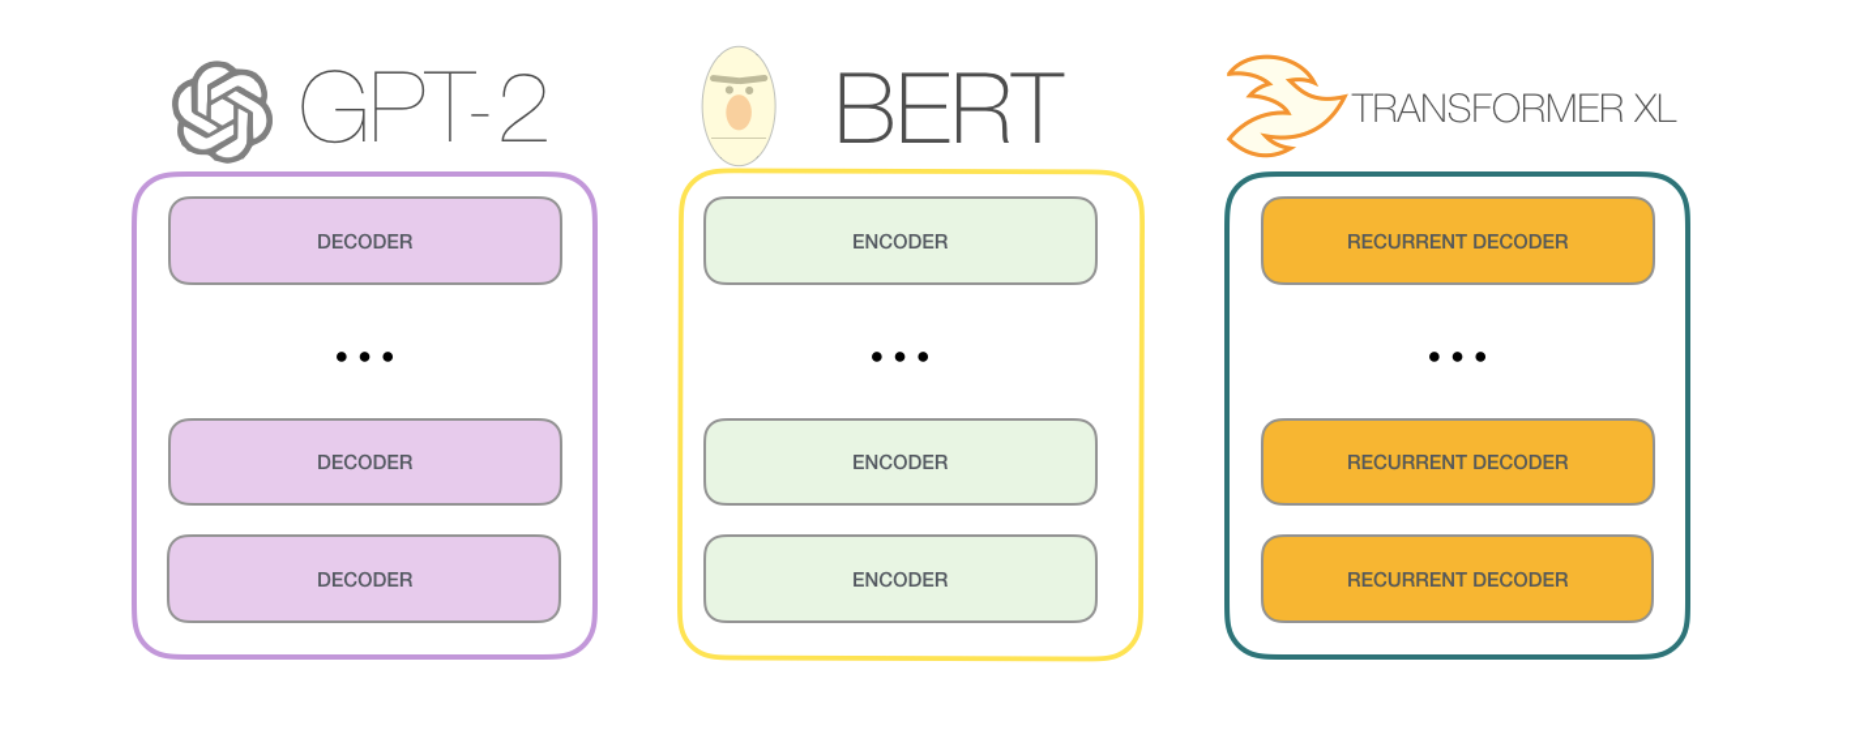

The image above is a diagram that compares the high-level architectures of three different Transformer-based language models: **GPT-2, BERT, and Transformer XL**.

**1. GPT-2 (Generative Pre-trained Transformer 2)**

- **Architecture:** GPT-2 is a decoder-only model. This is represented by the stack of "Decoder" blocks in the diagram.
- **Functionality:** Decoder-only models are primarily used for text generation. They are designed to predict the next token in a sequence, a process known as "autoregressive generation." Each decoder block attends to all previous tokens in the sequence, which allows it to understand the context and generate new, coherent text.
- **Key Concept:** The core idea behind a decoder-only model is its ability to learn language patterns and generate new content from scratch. This makes them ideal for tasks like creative writing, summarization, and building chatbots.

**2. BERT (Bidirectional Encoder Representations from Transformers)**

- **Architecture:** BERT is an encoder-only model. This is shown by the stack of "Encoder" blocks.
- **Functionality:** Encoder-only models are used for language understanding and are best suited for tasks where the entire sentence context is required. It reads the entire input sequence at once and learns a deep, bidirectional representation of the text.
- **Key Concept:** The main idea is that understanding the meaning of a word depends on the words that come before and after it. This bidirectional context, or "masked language modeling," allows BERT to excel at tasks like sentiment analysis, question answering, and text classification.

**3. Transformer XL**

- **Architecture:** Transformer XL uses a recurrent decoder architecture. This is a variation of the decoder-only design.
- **Functionality:** This model was created to solve a limitation of standard Transformers: the fixed context length. It uses a segment-level recurrence mechanism, meaning it processes a long text in segments. After processing one segment, it keeps the hidden states from the previous segment and reuses them as additional context when processing the next one.
- **Key Concept:** The recurrence mechanism allows Transformer XL to model dependencies that are longer than the fixed context window of a standard Transformer. This makes it more effective for tasks that involve very long documents, such as long-form summarization and understanding a book's entire plot.

In summary, the diagram illustrates the different architectural philosophies behind these influential models: one for pure generation (GPT-2), one for deep understanding (BERT), and a more advanced one for handling long-range dependencies (Transformer XL).

# GPT-2 Architecture

The GPT-2 architecture is a sophisticated, layered system designed for text generation. It processes input text and transforms it through a series of steps to produce a final output, token by token.

**1. Input and Embeddings**

The process begins with the input text, which is a sequence of words (or more accurately, tokens).

- **Tokenization:** Each word is converted into a numerical ID.
- **Token and Position Embeddings:** The diagram shows the Token Embed and Position Embed blocks. The input tokens are converted into dense vectors of a fixed size. The Token Embed block maps each token ID to its corresponding vector representation. Simultaneously, the Position Embed block generates vectors that capture the position of each token in the sequence.
- **Combining Embeddings:** These two sets of embeddings are added together. This is a crucial step because it gives the model both the semantic meaning of each word and its position in the sentence. The output of this stage is a (B, T, C) tensor, which represents the batch size, sequence length, and embedding dimensionality, respectively. According to the provided configuration, this would be a (512, 1024, 768) tensor.

**2. The Transformer Decoder Layer**

The combined embedding tensor is then fed into a stack of N decoder layers. For GPT-2, the number of layers is 12. The diagram shows the inner workings of a single decoder layer, which is composed of two main sub-layers.

- **Masked Multi-Head Self-Attention:** This is the core of the Transformer architecture.
    - **Scaled Dot-Product Attention:** This sub-layer calculates an attention score for each token, based on its relationship to all previous tokens in the sequence. It's "scaled" to prevent the scores from becoming too large.
    - **Mask:** The diagram highlights a Mask step. This is what makes GPT-2 a decoder-only model. The mask ensures that when the model is processing a given token, it can only attend to the tokens that came before it, not the ones that come after. This prevents it from "cheating" and seeing the future, which is essential for text generation.
    - **Multi-Head:** The diagram shows multiple Scale Dot-Product Attention boxes running in parallel, which are then concatenated. This is the "multi-head" part. It allows the model to simultaneously focus on different parts of the input sequence, capturing a wider range of relationships. With h=12 heads, the model can learn 12 different attention patterns for each token.
- **Feed-Forward Network:** The output of the attention mechanism is passed through a simple Feed Forward network. This layer provides a non-linear transformation that helps the model learn more complex patterns.

Both the attention and feed-forward sub-layers are wrapped in a Layer Norm and have a residual connection. These are vital for training deep networks, as they help stabilize the training process and prevent the vanishing gradient problem.

**3. The Final Output Layer**

After passing through all 12 decoder layers, the final tensor is transformed to produce the model's output.

- **Linear Layer:** A Linear layer maps the output from the final decoder block back to the vocabulary size. The output of this layer is a (B, T, V) tensor, where V is the vocabulary size. Each value in this tensor represents a raw, unnormalized probability (a "logit") for every token in the vocabulary.
- **Softmax:** The Softmax function takes the logits and converts them into a probability distribution. The output of this layer is a probability for every token in the vocabulary. The model can then use this distribution to sample or greedily select the next token in the sequence. The softmax step is where the final token is chosen to continue the text.

In short, GPT-2's architecture is a testament to the power of self-attention and autoregressive generation. It uses a stack of N decoder layers, each with a masked multi-head attention mechanism, to understand an input sequence and generate new, contextually relevant text.

![GPT-2 Architectural Diagram](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*YZTqlV51QyhX6VL9AV31eQ.png)

# Pipeline Overview

This tutorial demonstrates a pipeline for loading, configuring, and using a pre-trained GPT-2 model for text generation, followed by hyperparameter tuning to optimize generation quality. Below is a high-level overview of the pipeline, followed by a detailed description of the code, including the theories and concepts it employs.
Pipeline Overview

**Load Tokenizer:**

- Load the pre-trained GPT-2 tokenizer using `GPT2Tokenizer.from_pretrained('gpt2')`.
- The tokenizer converts raw text into numerical token IDs using Byte-Pair Encoding (BPE) and handles special tokens like `<|endoftext|>`.


**Load Pre-Trained Model:**

- Load the GPT-2 language model (`GPT2LMHeadModel`) with the pad_token_id set to the end-of-sequence token ID.
- This ensures proper handling of variable-length sequences during batch processing.


**Inspect Model and Tokenizer:**

- Print key tokenizer attributes (e.g., vocabulary size, special tokens, max model length) to verify configuration.
- Encode and decode a sample sentence to demonstrate tokenization.


**Text Generation:**

- Generate text using various decoding strategies: greedy search, beam search, random sampling, top-k sampling, top-p sampling, and combined top-k/top-p sampling.
- Each method uses the same input sentence (`"I am a large language model"`) and applies different hyperparameters to control diversity and quality.


**Hyperparameter Tuning:**

- Implement a function to calculate perplexity, a metric for evaluating text fluency.
- Tune hyperparameters (`top_k, top_p, temperature`) by generating text with different settings and selecting the combination with the lowest perplexity.


**Generate Text with Optimized Hyperparameters:**

- Use the best hyperparameters from tuning to generate text from a new input sentence ("LLMs can be fine-tuned for specific tasks or guided by prompt engineering").
- Generate multiple sequences to demonstrate the model's ability to produce varied outputs.

# Set Up Environment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%%capture
!pip install transformers
!pip install datasets
!pip install GPUtil
!pip install evaluate rouge-score sacrebleu nltk

# Import Libraries

In [3]:
import torch
import pandas as pd
from numba import cuda
from GPUtil import showUtilization as gpu_usage
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TrainingArguments, Trainer, default_data_collator, GPT2Tokenizer
import numpy as np
from datasets import load_dataset, Dataset
from evaluate import load
from torch.nn import CrossEntropyLoss
import warnings
from torch.nn import CrossEntropyLoss
warnings.filterwarnings("ignore", category=UserWarning)

2025-09-25 12:41:39.240179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758804099.511216      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758804099.590233      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load Tokenizer and GPT-2 Model

The GPT-2 model is an autoregressive language model based on the Transformer architecture. Its ability to generate coherent and contextually relevant text is largely dependent on its training on a massive dataset and its sophisticated method of handling text. The concepts in the code are fundamental to how GPT-2 and similar models function:

- **Autoregressive Language Model:** This is a model that predicts the next token in a sequence based on all the preceding tokens. This process is repeated to generate a full sentence or paragraph, making it highly effective for generative tasks.
- **Tokenization with Byte-Pair Encoding (BPE):** Unlike simple word-based tokenizers, GPT-2 uses Byte-Pair Encoding (BPE) to convert text into tokens. BPE starts with a vocabulary of individual characters. It then iteratively finds and merges the most frequent pairs of characters or character sequences into a single new token. This process continues until the vocabulary reaches a predefined size.
    - **Advantage:** This method is highly efficient. It can represent common words with a single token while also being able to handle rare or new words by breaking them down into a sequence of known subwords. This allows GPT-2 to process a massive vocabulary without the memory overhead of storing every possible word.
    - **Special Tokens:** The `<|endoftext|>` token is a crucial component of GPT-2's BPE-based tokenization. It is used to indicate the end of a text passage during training. For text generation, the model learns to generate this token to signal that it has finished its response. In this specific configuration, it is used for both the beginning and end of a sequence, which is a common practice for modern, fine-tuned versions of GPT-2 to provide a clear starting point for generation.

## Load Tokenizer

`tokenizer = GPT2Tokenizer.from_pretrained('gpt2')`: This line loads a pre-trained tokenizer. A tokenizer's job is to convert raw text into a sequence of numerical IDs that the model can understand. The 'gpt2' argument specifies that we are loading the tokenizer for the GPT-2 model.

In [4]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

## Load GPT-2 Model

`model = GPT2LMHeadModel.from_pretrained('gpt2', pad_token_id=tokenizer.eos_token_id)`, loads the pre-trained GPT-2 language model itself. The GPT2LMHeadModel is a class from the Hugging Face Transformers library designed for language modeling. Like the tokenizer, the 'gpt2' argument loads the small version of the model. 

The `pad_token_id` is a specific parameter used when loading the GPT-2 model. It tells the model which token ID to use for padding. Padding is necessary to ensure that all sequences in a batch have the same length, which is a requirement for efficient processing on GPUs. GPT-2 doesn't have a dedicated padding token, so a common workaround is to use the `eos_token_id` (end-of-sequence token) for this purpose.

The parameters `pad_token_id=tokenizer.eos_token_id` is a crucial configuration for text generation. It sets the padding token ID to the end-of-sequence token ID, which is a common practice for GPT-2. Since GPT-2 does not have a native padding token, using the end-of-sequence token allows the model to handle sequences of varying lengths correctly during batch processing without introducing new tokens.

In [5]:
model = GPT2LMHeadModel.from_pretrained('gpt2', 
                                        pad_token_id=tokenizer.eos_token_id)

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

# Inspect Tokenizer and Model Configuration

The section is a set of diagnostic statements used to inspect the configuration of a tokenizer for a language model, specifically a GPT-2 model. The purpose is to confirm the core parameters and special tokens that are essential for the model to correctly process and generate text. The output from these commands reveals several key pieces of information:

- **Maximum Model Length:** This property, typically 1,024 for GPT-2, defines the maximum number of tokens the model can process at once. If a text is longer than this, it must be split or truncated.
- **Beginning and End of Sequence Tokens:** These special tokens, `<|endoftext|>`, are critical for delimiting text. The code shows this token serves as both the beginning (`bos_token`) and end (`eos_token`) of a sequence.
- **Tokenizer:** The tokenizer's job is to convert human-readable text into a sequence of numbers (tokens) that a machine learning model can understand. The code inspects key properties of the GPT2Tokenizer.
- **Vocabulary Size:** This tells you the total number of unique tokens the tokenizer knows. For GPT-2, this is 50,257. This vocabulary includes not only words but also sub-words and special tokens.
- **All Special Tokens:** This provides a comprehensive list of all non-text tokens used for specific purposes, such as marking sequence boundaries. The `bos_token` (beginning of sequence) and `eos_token` (end of sequence) are crucial for telling the model where a sentence or text ends. For GPT-2, the same token, `<|endoftext|>`, is used for both.

The section demonstrates the concept of a tokenizer, which is the first step in the natural language processing (NLP) pipeline. The GPT-2 model uses a specific method called Byte-Pair Encoding (BPE). BPE is an efficient way to handle a large and diverse vocabulary by breaking words down into smaller, common sub-word units. This allows the model to process both common words and rare or new words without requiring a massive vocabulary size.

In [6]:
# Inspect Tokenizer Configuration
print("The max model length is {} for this model".format(tokenizer.model_max_length))
print("The beginning of sequence token {} token has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), 
                                                                      tokenizer.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), 
                                                          tokenizer.eos_token_id))

print(f"\nModel's vocabulary size: {tokenizer.vocab_size}")
print(f"All special tokens: {tokenizer.all_special_tokens}")
print(tokenizer)

# Inspect Tokenizer Configuration
print("\nSpecific tokenizer attributes:")
print(f"BOS Token ID: {tokenizer.bos_token_id}")
print(f"EOS Token ID: {tokenizer.eos_token_id}")
print(f"Max Model Length: {tokenizer.model_max_length}")

The max model length is 1024 for this model
The beginning of sequence token <|endoftext|> token has the id 50256
The end of sequence token <|endoftext|> has the id 50256

Model's vocabulary size: 50257
All special tokens: ['<|endoftext|>']
GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
)

Specific tokenizer attributes:
BOS Token ID: 50256
EOS Token ID: 50256
Max Model Length: 1024


# Encode and Decode a Sentence

This part of the code provides a practical example of the tokenizer in action.

- `tokenizer(sentence, return_tensors='pt')`: This function call tokenizes the input string 'I am a large language model' and returns the result as a PyTorch tensor. The output, a list of numerical IDs, is the model's representation of your sentence. For example, the output tensor([[ 40, 716, 257, 1588, 3303, 2746]]) shows how the tokenizer converts the words and sub-words of the sentence into numerical IDs.

- `tokenizer.decode(...)`: This is the reverse process. It takes a token ID and converts it back into a human-readable string. The output " large" shows that the token 1588 corresponds to the sub-word  large. The space at the beginning is an important detail of how GPT-2's BPE works.

This process highlights the core principle of tokenization, which is the bridge between human language and the numerical data that deep learning models can process. It also demonstrates transfer learning, where a pre-trained model and tokenizer are directly used for a new task (text processing) without needing to be trained from scratch.

In [7]:
# Encode and decode a sentence to demonstrate the tokenizer
sentence = 'I am a large language model'
input_data  = tokenizer(sentence, return_tensors = 'pt')

print("\nInput IDs:")
print(input_data['input_ids'])

print("\nDecoded 4th token:")
print(tokenizer.decode(input_data['input_ids'][0][3]))


Input IDs:
tensor([[  40,  716,  257, 1588, 3303, 2746]])

Decoded 4th token:
 large


# Text Generation Strategies (Generate the text given the sentence)

## Greedy Search

The section demonstrates Greedy Search, a simple yet effective text generation strategy used with large language models. This method is the most straightforward way to generate text, as it always selects the most probable next token at each step.

**Theories and Concepts**

- **Greedy Decoding:** This is a core concept in language model text generation. At each step, the model looks at the probability distribution of all possible next tokens and simply chooses the one with the highest probability. It's "greedy" because it makes the locally optimal choice at every step without considering how that choice might affect future steps.
- **The Downside of Greedy Search:** While simple, greedy search can lead to suboptimal results. The model might miss a less probable token that could lead to a more coherent or interesting sequence later on. This can result in repetitive or generic-sounding text, which is why the `no_repeat_ngram_size` parameter is so important.
- **Attention Mechanism:** The `attention_mask` parameter relates to the Transformer architecture that powers models like GPT-2. The attention mechanism allows the model to weigh the importance of different words in a sequence when generating a new token. The mask ensures that the model focuses only on the actual input and not on any padding that might have been added.

In summary, this code demonstrates how to use the simplest text generation strategy, Greedy Search, while also applying a practical technique (`no_repeat_ngram_size`) to mitigate its primary weakness and produce more natural-sounding output

**Step-By-Step Breakdown**

- `model.generate(...)`: This is the core function call from the Hugging Face transformers library. It tells the model to start generating new text based on the provided input.
- `input_ids and attention_mask`: These parameters are essential. They provide the model with the starting text (your tokenized sentence) and tell the model which tokens to pay attention to and which to ignore (like padding tokens).
- `max_length=100`: This hyperparameter sets the maximum length of the generated sequence, including the input text. In this case, the output will contain at most 100 tokens.
- `no_repeat_ngram_size=2`: This is a crucial parameter for improving the quality of the generated text. An "ngram" is a contiguous sequence of n items from a given text. By setting `no_repeat_ngram_size=2`, you are telling the model to avoid repeating any sequence of two tokens (a bigram). This prevents the model from getting stuck in repetitive loops, such as "I am a programmer, I am a programmer, I am a programmer..."
- `tokenizer.decode(...)`: After the model has generated the numerical sequence of tokens, this line converts it back into a human-readable string. The `skip_special_tokens=True` argument ensures that tokens like `<|endoftext|>` are not included in the final output.

In [8]:
# Generate text using the fixed attention mask
greedy_output = model.generate(input_ids=input_data['input_ids'],
                               attention_mask=input_data['attention_mask'],
                               max_length=100,
                               no_repeat_ngram_size=2)
for i, output in enumerate(greedy_output):
    print("\nGenerated output {}:".format(i))
    print(tokenizer.decode(output, 
                           skip_special_tokens=True))


Generated output 0:
I am a large language model, and I am not a programmer. I have a lot of experience with programming languages, but I don't have the experience to write a language that is as good as Java.

I have been working on a new language called Java since I was a kid. It is a very simple language, with a few features that are very similar to Java, like the ability to create and manipulate objects, the use of the Java Virtual Machine, etc. But I think


## Beam Search 

This section demonstrates Beam Search, a more sophisticated text generation strategy that aims to produce higher-quality, more coherent output than Greedy Search. Instead of simply picking the single most probable token at each step, Beam Search explores multiple possible sequences of tokens simultaneously.

**Theories and Concepts**

- **Greedy vs. Beam Search:** This code highlights the difference between a local search (Greedy Search) and a global search (Beam Search). Greedy Search is fast but prone to suboptimal solutions. Beam Search is slower and more computationally expensive but often produces a much more coherent and high-quality result.
- **Optimal Decoding:** The goal of any text generation algorithm is to find the most probable sequence of tokens. While finding the truly optimal (most probable) sequence is computationally infeasible for a large vocabulary, Beam Search provides a good approximation. It is not guaranteed to find the absolute best sequence, but it almost always finds a much better one than Greedy Search.
- **Trade-off:** The choice of `num_beams` involves a computational trade-off. A larger number of beams will increase the chances of finding a better sequence but will also require significantly more computation and memory. A small number of beams, like 5 or 10, is often a good balance.

**Step-By-Step Breakdown**

Beam Search functions by expanding the search space and making decisions based on the total probability of a sequence, not just the next token.

- **Step 1:** At the beginning, the model considers all possible next tokens for the initial input. It selects the `num_beams` (e.g., 5) most probable next tokens.
- **Step 2:** For each of these 5 tokens, the model considers all possible next tokens, creating many new sequences. It then evaluates the combined probability of each new sequence and selects only the top 5 most probable ones to continue the search.
- **Step 3:** The model then calculates the combined probability of each new, two-token sequence and again keeps only the top 5 most probable ones.
- **Repeat:** This process continues iteratively until the `max_length` is reached or an `early_stopping` condition is met.

By considering multiple paths, Beam Search significantly reduces the risk of making a bad local decision early on that would lead to a low-quality final output. As you can see from your generated outputs, the 5 sequences are all quite similar, but they have slight variations at the end, demonstrating how the algorithm explores different continuations while staying on a high-probability path.

**Beam Search in Detail**

- `num_beams=5`: This is the core hyperparameter of the algorithm. It defines the "beam width," which is the number of candidate sequences (or "beams") the model keeps track of at each step. In this case, the model will maintain a list of the 5 most promising partial sentences.
- `num_return_sequences=5`: This parameter specifies how many of the top generated sequences to return at the end of the process. This allows you to compare and choose from multiple high-quality outputs.
- `early_stopping=True`: This tells the model to stop generating a sequence once it finds the `<|endoftext|>` token, which marks the end of a complete sentence. This prevents the model from generating unnecessarily long or incomplete sentences.
- `no_repeat_ngram_size=2`: Similar to the Greedy Search example, this helps prevent the model from getting stuck in repetitive loops. It ensures that the generated text is more diverse and less predictable.

In [9]:
# Generate text using beam search with a fixed attention mask
beam_output = model.generate(input_ids=input_data['input_ids'],
                             attention_mask=input_data['attention_mask'],
                             max_length=100,
                             num_beams=5,
                             num_return_sequences=5,
                             no_repeat_ngram_size=2,
                             early_stopping=True)

print("\nBeam search outputs:" , beam_output)


Beam search outputs: tensor([[  40,  716,  257, 1588, 3303, 2746,  263,   11,  290,  314,  423,  257,
         1256,  286,  670,  284,  466,   13,  314,  765,  284,  787,  340, 2562,
          329,  661,  284, 1833,  644,  314,  716, 3375,  546,   13,  198,  198,
           40,  423,  587, 1762,  319,  428, 1628,  329,  257,  890,  640,   11,
          523,  314,  460,  470, 1107, 1561,  546,  340,  994,   11,  475,  314,
          481,  910,  326,  340,  318,  257,  845, 3499, 1628,   13, 1318,  389,
          257, 1178, 1243,  326,  314,  561,  588,  284,  751,  284,  340,   13,
         3274,  286,  477,   11,  314,  892,  340,  561,  307, 3621,  284,  423,
          262, 2694,  284, 2251],
        [  40,  716,  257, 1588, 3303, 2746,  263,   11,  290,  314,  423,  257,
         1256,  286,  670,  284,  466,   13,  314,  765,  284,  787,  340, 2562,
          329,  661,  284, 1833,  644,  314,  716, 3375,  546,   13,  198,  198,
           40,  423,  587, 1762,  319,  428, 1628,  3

In [10]:
for i, output in enumerate(beam_output):
    print("\nGenerated output {}:".format(i))
    print(tokenizer.decode(output, 
                           skip_special_tokens=True))
    print("-"*80)


Generated output 0:
I am a large language modeler, and I have a lot of work to do. I want to make it easy for people to understand what I am talking about.

I have been working on this project for a long time, so I can't really talk about it here, but I will say that it is a very interesting project. There are a few things that I would like to add to it. First of all, I think it would be nice to have the ability to create
--------------------------------------------------------------------------------

Generated output 1:
I am a large language modeler, and I have a lot of work to do. I want to make it easy for people to understand what I am talking about.

I have been working on this project for a long time, so I can't really talk about it here, but I will say that it is a very interesting project. There are a few things that I would like to add to it. First of all, I think it would be nice to have the ability to use
--------------------------------------------------------------------

## Random Sampling

This section demonstrates a text generation strategy called Random Sampling (or simple sampling). This method introduces a degree of randomness into the generation process, which makes the output more creative and less predictable compared to deterministic methods like Greedy Search and Beam Search.

**Theories and Concepts**

- **Probabilistic Generation:** Unlike Greedy Search, which always picks the most probable token, and Beam Search, which considers the most probable sequences, Random Sampling treats the model's output as a probability distribution. At each step, it essentially holds a lottery, where each token in the vocabulary has a ticket whose size corresponds to its probability. The model then randomly draws one of these tickets to select the next token. This probabilistic nature is what gives the generated text its creative and unpredictable quality.

- **The Trade-off between Coherence and Diversity:** Random sampling highlights the core trade-off in text generation.
    - **High Coherence (Low Randomness):** Methods like Greedy Search produce very predictable, often repetitive text.
    - **High Diversity (High Randomness):** Simple random sampling can produce highly creative and unique text, but at the risk of generating incoherent or nonsensical content.

The temperature hyperparameter provides a powerful way to manage this trade-off, allowing you to fine-tune the model's output for your specific needs, whether that is a highly coherent summary or a more creative piece of writing.

**Step-By-Step Breakdown**

- `do_sample=True`: This is the primary parameter that enables a sampling-based approach. When this is set to True, the model no longer uses a greedy or beam search strategy. Instead, it draws the next token from the probability distribution over its entire vocabulary.
- `temperature=0.8`: This is a crucial hyperparameter that controls the level of randomness in the output. Temperature acts as a scaling factor for the model's output probabilities (called logits).
    - A temperature of 1.0 means the model uses the raw probability distribution.
    - A temperature less than 1.0 (like 0.8 in this code) makes the distribution "sharper," increasing the probabilities of the most likely tokens and decreasing the probabilities of less likely ones. This results in more focused and coherent, but still randomized, output.
    - A temperature greater than 1.0 makes the distribution "flatter," making it more likely for the model to choose less probable tokens. This leads to more diverse and creative, but potentially less coherent, text.
- `top_k=0`: This parameter is typically used with sampling to limit the number of tokens to sample from. By setting it to 0, you are telling the model not to apply any top-k filtering. In this case, it considers the entire vocabulary when sampling the next token.

In [11]:
# Generate text using random sampling with a fixed attention mask
random_output = model.generate(input_ids=input_data['input_ids'],
                               attention_mask=input_data['attention_mask'],
                               do_sample=True,
                               max_length=100,
                               top_k=0,
                               temperature=0.8)

print("\nRandom sampling outputs:", random_output)


Random sampling outputs: tensor([[   40,   716,   257,  1588,  3303,  2746,   357,    40,   716,  3058,
           257, 16394,  3710,   287,   262, 10870, 19838,   379,   262,  2059,
           286,  3442,    11, 14727,   737,  2080,   607,  3632,   290, 10802,
           673,   318,  1498,   284,  4255,  4451, 14296,  1262,   257,   649,
          2099,   286, 20399,    11,   543,  3607,   340,   257,  3236,  4621,
           625,   262,  4569,  4255,  2070,    13,  1318,   389,   635,   257,
          1256,   286,  1180,  3303,  4981,  1695,    25,   198,   198,  3666,
           649,  1492,   318,  1444, 10880,  8261, 12106,    13,   198,   198,
           464,  1492,   373,  2727,   329,   674, 10273,  3783,  1561,    13,
           632,  4909,   257,  1256,   286, 40840, 13386,   422, 24858,   532]])


In [12]:
for i, output in enumerate(random_output):
    print("\nGenerated output {}:".format(i))
    print(tokenizer.decode(output, skip_special_tokens=True))


Generated output 0:
I am a large language model (I am currently a PhD student in the cognitive sciences at the University of California, Berkeley). With her brain and confusion she is able to cook smart recipes using a new type of processors, which gives it a huge advantage over the traditional cookbook. There are also a lot of different language models available:

My new book is called Smart Cookbooks.

The book was created for our weekly science talk. It contains a lot of inspirational quotes from philosophers -


## Top-K Sampling

This section uses a text generation strategy called Top-K Sampling. This technique addresses a major weakness of simple random sampling by introducing a constraint on the vocabulary, which helps to create more coherent and natural-sounding text while retaining an element of creativity.

**Theories and Concepts**

- **The Problem with Unconstrained Sampling:** Simple random sampling, where every token has a chance of being picked, can often lead to nonsensical or irrelevant output. This is because a token with a very low probability might be randomly selected, derailing the entire generated sequence. For example, a model might correctly predict that the next word should be "cat" or "dog," but a random chance might pick "rhinoceros," which could lead to an incoherent sentence.
- **Top-K as a Solution:** Top-K sampling solves this problem by ensuring that the model only samples from a reasonable list of candidates. This approach guarantees that the selected token is always one of the most likely choices, striking a good balance between maintaining the quality and coherence of the text and allowing for a degree of creative randomness. The value of k directly controls this trade-off: a smaller k makes the output more predictable and focused, while a larger k allows for more diversity and creativity.
- **Contrast with Other Methods:** Unlike Greedy Search and Beam Search, which are deterministic and will always produce the same output for the same input, Top-K Sampling is a stochastic method. This means that if you run the code multiple times with the same input, you will likely get a different output each time, which is ideal for tasks that require creative or varied responses.

Top-K sampling is a popular and effective method for generative tasks, as it provides a simple and intuitive way to control the creativity of a language model. It's often used in conjunction with other techniques like Top-P (Nucleus) Sampling, which offers even more dynamic control.

**Step-By-Step Breakdown**

- `do_sample=True`: This is the parameter that activates a probabilistic, non-deterministic generation mode, which is required for all sampling methods.
- `top_k=50`: This is the key parameter for this method. At each step of the generation process, the model looks at the entire vocabulary of possible next tokens and their associated probabilities. Instead of sampling from the entire vocabulary, it identifies the 50 most probable tokens and discards all others. The next token is then randomly selected only from this filtered set of 50 tokens.

In [13]:
# Generate text using top-k sampling with a fixed attention mask
top_k_output = model.generate(input_ids=input_data['input_ids'],
                              attention_mask=input_data['attention_mask'],
                              do_sample=True,
                              max_length=100,
                              top_k=50)

print("\nTop-K sampling outputs:", top_k_output)


Top-K sampling outputs: tensor([[   40,   716,   257,  1588,  3303,  2746,    13,   628,   198,    40,
          1101,   422, 12551,    11,   523,   314,   766,   703,   314,   714,
         12082,   644,   314,   760,  1541,   284,   787,   340,  2128,   588,
           281,  3594,  6827,    13,  1406,  1521,  1422,   470,   314,  2291,
           340,   706,   477,    30,   366,  5297,     0,   887,   314,  1107,
           460,   470,   910,   326,   611,   314,  2227,   284,   910,   366,
          3919,   356,   481,   407,   423,   257,  4845,  1600,   314,   836,
           470,   892,   644,   314,   765,   481,   670,    13,   314,   892,
           340,   481,   307,  1327,   284,   787,   257, 17101,  4578,   546,
           262,  3616,   286,   257,  6827,    11,   543,   373,   407,  4001]])


In [14]:
for i, output in enumerate(top_k_output):
    print("\nGenerated output {}:".format(i))
    print(tokenizer.decode(output, skip_special_tokens=True))


Generated output 0:
I am a large language model.


I'm from Singapore, so I see how I could combine what I know already to make it sound like an English sentence. So why didn't I include it after all? "Yes! But I really can't say that if I wanted to say "no we will not have a marriage", I don't think what I want will work. I think it will be hard to make a convincing argument about the meaning of a sentence, which was not meant


## Top-P Sampling

This section uses a text generation strategy called Top-P Sampling, also known as Nucleus Sampling. This is an advanced and highly effective method that refines the idea of random sampling to produce text that is both creative and coherent.

**Theories and Concepts**

- **The Dynamic Vocabulary Problem:** Top-K sampling, while an improvement over simple random sampling, has a key limitation: the value of k is fixed. In some cases, a fixed k might be too small, excluding potentially good tokens when the probability distribution is flat. In other cases, a fixed k might be too large, including many low-probability tokens that could lead to nonsensical output when the distribution is sharp.
- **Top-P as a Solution:** Top-P sampling solves this problem by using a dynamic nucleus. The size of the sampling pool changes at every step, adapting to the current probability distribution. If the model is very confident about the next token (a sharp distribution), the pool will be small. If the model is uncertain and many tokens have similar probabilities (a flat distribution), the pool will be larger.
- **Balancing Coherence and Diversity:** The Top-P approach provides a more flexible and robust way to manage the trade-off between generating coherent text and allowing for creative, diverse output. A higher p value (e.g., 0.95) will lead to more randomness and creativity, while a lower p value (e.g., 0.7) will produce more predictable and focused text. Because it intelligently adapts the sampling pool, it often generates more natural-sounding text than Top-K.

This method is considered one of the most effective and widely-used text generation strategies because it intelligently adjusts to the context, providing a high degree of control over the output while maintaining a high level of quality.

**Step-By-Step Breakdown**

- `do_sample=True`: This parameter is the prerequisite for any sampling-based generation method. It tells the model to not simply pick the most probable token but instead draw from a probability distribution.
- `top_p=0.8`: This is the core hyperparameter of this method. It defines the "nucleus" from which the next token will be sampled. At each step, the model sorts all possible next tokens by their probability in descending order. It then adds tokens to a pool, starting with the most probable, until the sum of their probabilities reaches or exceeds 0.8. The next token is then randomly selected only from this filtered pool. All other tokens are completely discarded.
- `top_k=0`: By setting top_k to 0, you are disabling the Top-K sampling method. This ensures that only the Top-P method is active, allowing it to determine the sampling pool on its own.

In [15]:
# Generate text using top-p sampling with a fixed attention mask
top_p_output = model.generate(input_ids=input_data['input_ids'],
                              attention_mask=input_data['attention_mask'],
                              do_sample=True,
                              max_length=100,
                              top_p=0.8,
                              top_k=0)

print("\nTop-P sampling outputs:", top_p_output)


Top-P sampling outputs: tensor([[   40,   716,   257,  1588,  3303,  2746,    13,   383,  1917,   318,
           326,  3303,  4981,   836,   470,  1249,   262, 28948,   425,  4856,
           286,  1366,   546,   281,  1981,    11,   393,   772,   319,   257,
         44422,    11,   290,   428,  2125,   470,  1107,   257,  1917,   329,
           502,    11,   780,   314,   836,   470,   423,   777,  6982,   286,
          7538, 23607,    13,   314,   716,   407,  1802,     4,  1654,  1771,
           262,   517,   640,   314,   423,   287,   262,  2272,    11,   262,
           517,  7187,   314,   716,    11,   475,   314,   716,  2495,  1654,
           326,   262,   517,  7187,   314,   716,    11,   262,   517,  7187,
           314,   460,  1716,    13,   198,   198,  2514,  1833,   703,   356]])


In [16]:
print("\nTop-P sampling outputs:")
for i, output in enumerate(top_p_output):
    print("\nGenerated output {}:".format(i))
    print(tokenizer.decode(output, skip_special_tokens=True))


Top-P sampling outputs:

Generated output 0:
I am a large language model. The problem is that language models don't allow the inductive testing of data about an individual, or even on a continuum, and this isn't really a problem for me, because I don't have these kinds of feedback loops. I am not 100% sure whether the more time I have in the space, the more accurate I am, but I am pretty sure that the more accurate I am, the more accurate I can become.

To understand how we


## Top-K and Top-P Sampling

The section demonstrates a hybrid text generation strategy that combines Top-K and Top-P Sampling. This powerful approach leverages the strengths of both methods to produce high-quality text that is both coherent and creative.

**Theories and Concepts**

- **The Best of Both Worlds:** The main theoretical idea behind combining Top-K and Top-P is to mitigate the weaknesses of each method when used alone.
- **Top-K's Weakness:** As we've discussed, Top-K can sometimes be too restrictive if the probability distribution is flat, or too permissive if it's very sharp. It can also be difficult to pick a fixed value for k that works well across all contexts.
- **Top-P's Weakness:** In certain scenarios, Top-P might create a very small nucleus, perhaps containing only one or two words, if the model is extremely confident. This can lead to a lack of creative options, essentially reverting to a greedy-like search. It can also be less predictable.
- **The Hybrid Solution:** By using both methods, the code creates a more robust and flexible filtering system. The top-k filter acts as a safety net, ensuring that even if the top-p nucleus is very small, there are still a handful of high-probability tokens to sample from. Conversely, the top-p filter ensures that the model doesn't get stuck in a fixed k size, adapting the candidate pool to the specific probability distribution at each step. This hybrid approach consistently produces more natural and high-quality text, making it a popular choice for complex generative tasks.

This combination is a great example of how different techniques can be layered to improve the performance and behavior of a language model.

**Step-By-Step Breakdown**

- `do_sample=True`: This parameter tells the model to use a probabilistic approach for generation rather than a deterministic one.
- `top_k=50`: This parameter is the first filter. At each step, the model looks at the probability distribution of all possible next tokens and immediately discards any tokens that are not among the top 50 most probable ones.
- `top_p=0.85`: This is the second, and most important, filter. After the top-k filter has been applied, the remaining tokens are sorted by probability. The model then builds a "nucleus" of tokens by summing their probabilities until the total reaches or exceeds 0.85. The final pool of candidates is the intersection of these two sets: the top 50 tokens and the tokens within the 85% probability nucleus. The next token is then randomly sampled from this final, refined pool.

In [17]:
# Generate text using combined top-k and top-p sampling
top_k_p_outputs = model.generate(input_ids=input_data['input_ids'],
                                 attention_mask=input_data['attention_mask'],
                                 do_sample=True,
                                 max_length=100,
                                 top_k=50,
                                 top_p=0.85,
                                 num_return_sequences=5)

print("\nCombined Top-K and Top-P sampling outputs:",top_k_p_outputs)


Combined Top-K and Top-P sampling outputs: tensor([[   40,   716,   257,  1588,  3303,  2746,  3710,   379, 11131,  3854,
          3961,   290,   373, 30103,   416,   644,   339,  4499,  1141,   465,
         22952,  1430,    13,   679,   635,  2630,   257,  1790, 14268,  1444,
           366,  2437,   284, 24390, 11204,   257,  5542,  1869,  1911,   770,
          2708,  8477,   617,   286,   465,  4213,   290,   617,   286,   262,
          2219, 45716,   286, 11524,   777,  4213,   284,   262,  2742,  7573,
            13,   198,   198,  2061,  8314,   257,  3854,  9860, 22728,    30,
           198,   198,     1, 16966, 21200,   389,   661,   286,   262,  1171,
           922,    13,   887,   284,   307,  2742,   318,   284,   307,   257,
          1692,   852,    13,  1675,   307,   257,  1692,   852,   318,   284],
        [   40,   716,   257,  1588,  3303,  2746,    12,  3106, 22454,  1008,
           290,   340,   338,  2407,  1744,   284,   307,   257,   366,  5305,
       

In [18]:
for i, output in enumerate(top_k_p_outputs):
    print("\nGenerated output {}:".format(i))
    print(tokenizer.decode(output, skip_special_tokens=True))
    print("-"*80)


Generated output 0:
I am a large language model student at Harvard Law School and was fascinated by what he learned during his undergraduate program. He also wrote a short essay called "How to Avoid Being a Dead Man". This article describes some of his ideas and some of the common pitfalls of applying these ideas to the legal profession.

What Does a Lawyer Mean?

"Lawyers are people of the public good. But to be legal is to be a human being. To be a human being is to
--------------------------------------------------------------------------------

Generated output 1:
I am a large language model-based learner and it's quite possible to be a "realistic learner" and not have to follow a whole lot of standard set of grammar rules.

In the next chapter I'll explain some of the rules I followed and what they are for learners of any language.

What does the grammar rule mean for a learner?

A grammar rule is a set of rules you follow to determine the correct way of describing a word or phra

# Text Generation Hyperparameter Tuning

This section automates the process of finding the best text generation parameters (hyperparameter tuning) for a language model by systematically evaluating different combinations and selecting the one that produces the most coherent output. This section relies on two fundamental concepts: perplexity as an evaluation metric and a grid search-based approach to hyperparameter tuning.

**1. Perplexity as an Evaluation Metric**

The `calculate_perplexity` function is the heart of this code. It's designed to measure how well a language model predicts a given sequence of text.

**What is Perplexity?**

- **Perplexity:** This metric measures how well the language model predicts a sequence of words. It is based on the probability distribution that the model assigns to the text. A lower perplexity score indicates that the model is more confident in its predictions and that the generated text is more fluent and natural.
- In simple terms, perplexity is a measure of how "surprised" a model is by the text it's given. A low perplexity score indicates that the model is confident in its predictions and that the text is a good fit for what the model has learned from its training data. Conversely, a high score means the model is very uncertain about the sequence. For text generation, we assume that text with a lower perplexity is more natural-sounding and coherent.
- Perplexity is derived directly from the model's cross-entropy loss. The code first calculates the loss of the model's predictions on a given text sequence. The `shift_logits` and `shift_labels` are essential here; they align the model's predictions for each token with the actual next token in the sequence. The perplexity is then calculated as the exponential of the average cross-entropy loss, as shown in the formula below:

![Perplexity](https://pbs.twimg.com/media/GMFtN0iWwAAKixQ.png)

**2. The Hyperparameter Tuning Process**

The `tune_hyperparameters` function implements a basic grid search algorithm to find the optimal combination of generation parameters.

- **Search Space:** The code first defines a search space for the three key sampling parameters:

    - `top_k_values`: The number of tokens to consider at each step.
    - `top_p_values`: The cumulative probability threshold for sampling.
    - `temperature_values`: The randomness factor.

- **Systematic Evaluation:** The function then iterates through every possible combination of these values. For each combination, it generates a sample of text and uses the `calculate_perplexity` function to get a score.

- **Optimal Selection:** It keeps a running record of the `best_perplexity` found so far and the corresponding `best_params`. At the end of the process, it returns the set of hyperparameters that resulted in the lowest perplexity, indicating that this combination is likely to produce the most coherent and natural-sounding text.

This approach provides a robust and data-driven way to go beyond simple intuition when choosing generation settings. Instead of guessing, you are letting the model's performance on a validation task guide your choices.
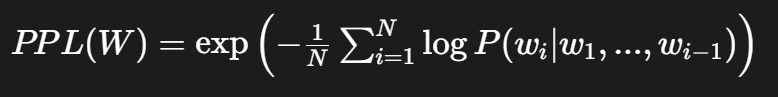

In [19]:
# --- Start of Hyperparameter Tuning Code ---

# Function to calculate perplexity
def calculate_perplexity(model, text, tokenizer):
    """Calculates the perplexity of a given text."""
    with torch.no_grad():
        # Encode the text and get the input IDs
        encodings = tokenizer(text, return_tensors='pt')
        input_ids = encodings['input_ids']
        attention_mask = encodings['attention_mask']

        # Get the model's logits
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Shift the logits and labels for perplexity calculation
        shift_logits = logits[..., :-1, :].contiguous()
        shift_labels = input_ids[..., 1:].contiguous()
        
        # Calculate cross-entropy loss
        loss_fct = CrossEntropyLoss(reduction='none')
        loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
        
        # Perplexity is exp(mean loss)
        perplexity = torch.exp(torch.mean(loss))
        return perplexity.item()

# Function to tune hyperparameters for sentence generation
def tune_hyperparameters(model, tokenizer, input_text, validation_text):
    """Tunes hyperparameters for text generation using perplexity as a metric."""
    # Define the search space for hyperparameters
    top_k_values = [0, 25, 50]
    top_p_values = [0.8, 0.9, 0.95]
    temperature_values = [0.7, 0.8, 1.0]

    best_perplexity = float('inf')
    best_params = {}

    print("\nStarting hyperparameter tuning...")
    print("-----------------------------------")

    for k in top_k_values:
        for p in top_p_values:
            for temp in temperature_values:
                # Generate a sample sentence with the current parameters
                generated_output = model.generate(
                    tokenizer(input_text, return_tensors='pt')['input_ids'],
                    attention_mask=tokenizer(input_text, return_tensors='pt')['attention_mask'],
                    do_sample=True,
                    max_length=100,
                    top_k=k,
                    top_p=p,
                    temperature=temp
                )
                generated_text = tokenizer.decode(generated_output[0], skip_special_tokens=True)

                # Calculate perplexity of the generated text
                try:
                    current_perplexity = calculate_perplexity(model, generated_text, tokenizer)
                except IndexError:
                    # Skip if the generated text is too short or problematic
                    continue

                print(f"Testing params: top_k={k}, top_p={p}, temp={temp} -> Perplexity: {current_perplexity:.2f}")

                # Update best parameters if a lower perplexity is found
                if current_perplexity < best_perplexity:
                    best_perplexity = current_perplexity
                    best_params = {'top_k': k, 'top_p': p, 'temperature': temp}

    print("-----------------------------------")
    print("\nHyperparameter tuning complete.")
    print(f"Best perplexity: {best_perplexity:.2f}")
    print(f"Best hyperparameters: {best_params}")
    return best_params

# Example usage of the tuning function
input_sentence_for_generation = "A large language model (LLM) is a language model trained with self-supervised machine learning on a vast amount of text"
validation_text_for_perplexity = "The largest and most capable LLMs are generative pre-trained transformers (GPTs), based on a transformer architecture, which are largely used in generative chatbots such as ChatGPT, Gemini and Claude."

# Call the tuning function
best_params = tune_hyperparameters(model, tokenizer, input_sentence_for_generation, validation_text_for_perplexity)


Starting hyperparameter tuning...
-----------------------------------
Testing params: top_k=0, top_p=0.8, temp=0.7 -> Perplexity: 9.18
Testing params: top_k=0, top_p=0.8, temp=0.8 -> Perplexity: 12.11
Testing params: top_k=0, top_p=0.8, temp=1.0 -> Perplexity: 25.18
Testing params: top_k=0, top_p=0.9, temp=0.7 -> Perplexity: 15.61
Testing params: top_k=0, top_p=0.9, temp=0.8 -> Perplexity: 14.49
Testing params: top_k=0, top_p=0.9, temp=1.0 -> Perplexity: 38.26
Testing params: top_k=0, top_p=0.95, temp=0.7 -> Perplexity: 13.76
Testing params: top_k=0, top_p=0.95, temp=0.8 -> Perplexity: 21.45
Testing params: top_k=0, top_p=0.95, temp=1.0 -> Perplexity: 45.31
Testing params: top_k=25, top_p=0.8, temp=0.7 -> Perplexity: 7.07
Testing params: top_k=25, top_p=0.8, temp=0.8 -> Perplexity: 11.12
Testing params: top_k=25, top_p=0.8, temp=1.0 -> Perplexity: 11.34
Testing params: top_k=25, top_p=0.9, temp=0.7 -> Perplexity: 12.34
Testing params: top_k=25, top_p=0.9, temp=0.8 -> Perplexity: 14.51

# Model with The Best Hyperparameters

The section demonstrates the practical application of the concepts we've discussed. It uses a language model to generate text with a specific set of hyperparameters (`top_k=25, top_p=0.8, temperature=0.7`) that were presumably chosen as the best values after a tuning process like the one we saw earlier.

**Putting It All Together**

**This script represents the end goal of the text generation workflow:** using the most effective combination of parameters to generate high-quality text. Here's a breakdown of the key elements:

- `top_k=25`: This parameter restricts the next token selection to the top 25 most probable words at each step. This acts as the first line of defense against incoherent or nonsensical outputs by immediately discarding low-probability options.
- `top_p=0.8`: From the remaining 25 tokens, this parameter creates a dynamic subset (a "nucleus") by including only those tokens whose cumulative probability is 80% or greater. This makes the sampling process more efficient and allows it to adapt to the model's confidence level. If the model is very confident about a few next words, the nucleus will be small. If it's less certain, the nucleus will be larger.
- `temperature=0.7`: This final parameter adds a controlled amount of randomness to the selection process. By "cooling" the probabilities (a temperature value less than 1.0), it slightly increases the chances of the most probable tokens being selected, while still allowing for some variability. This fine-tuning helps ensure the output is both diverse and coherent.

The output you see from the code shows the results of this combined approach. The generated text is generally coherent and flows naturally, but it also demonstrates an element of creativity, producing multiple distinct sequences from the same initial input. This is the power of combining these techniques - you get a balance of quality and originality that a single, simple method couldn't provide.

In [20]:
# Encode and decode a sentence to demonstrate the tokenizer
sentence = 'LLMs can be fine-tuned for specific tasks or guided by prompt engineering.'
input_data  = tokenizer(sentence, return_tensors = 'pt')

# Generate text using combined top-k and top-p sampling
top_k_p_outputs = model.generate(input_ids=input_data['input_ids'],
                                 attention_mask=input_data['attention_mask'],
                                 do_sample=True,
                                 max_length=100,
                                 top_k=25,
                                 top_p=0.8,
                                 temperature=0.7,
                                 num_return_sequences=5)

print("\nCombined Top-K and Top-P sampling outputs:")
for i, output in enumerate(top_k_p_outputs):
    print("\nGenerated output {}:".format(i))
    print(tokenizer.decode(output, skip_special_tokens=True))
    print("-"*80)


Combined Top-K and Top-P sampling outputs:

Generated output 0:
LLMs can be fine-tuned for specific tasks or guided by prompt engineering.

To make sure your team is ready to work on a project, you can use the task manager to select the appropriate task to focus on. For example, you can choose to focus on the following tasks:

Create a new task for your team

Write a new task for your team

Create a new task for your team Create a new task for your team

To do so,
--------------------------------------------------------------------------------

Generated output 1:
LLMs can be fine-tuned for specific tasks or guided by prompt engineering.

The most common way to use the system is with a simple command:

$ python -m numpy-pipeline.py

The numpy-pipeline.py command is a simple Python program that runs on a Raspberry Pi, and it will run the numpy-pipeline.py program. It will run on the Raspberry Pi, and the numpy-p
--------------------------------------------------------------------------

**Evaluation of a Large Language Model (LLM)**

This final section is designed to evaluate the performance of a language model, such as GPT-2, using a combination of intrinsic and extrinsic metrics. The code provides a robust framework to not only generate text but also quantitatively assess its quality.

**Intrinsic vs. Extrinsic Evaluation**

The script's approach to evaluation is comprehensive, combining two distinct types of metrics:

- **Intrinsic Evaluation:** Measures the model's internal capabilities, such as its ability to predict the next word in a sequence. This is done without comparing the output to human-generated text. Perplexity is the key intrinsic metric used here.
- **Extrinsic Evaluation:** Measures the model's performance on a specific task, such as text generation, by comparing its output against a reference or "ground truth" text. ROUGE and BLEU are the extrinsic metrics used in this script.

**Perplexity: A Measure of Surprise**

Perplexity (PPL) is a fundamental metric in language modeling. It quantifies how well a probability model predicts a sample. In simpler terms, a model with a low perplexity score is "less surprised" by a given text, meaning it assigns a high probability to the sequence of words. A lower perplexity score indicates a better-performing model.

**ROUGE: Evaluating Text Against a Reference**

ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is a set of metrics used for evaluating the quality of an automatically generated summary or text against a set of human-created reference summaries. It is based on recall, measuring how many n-grams (contiguous sequences of n items) from the reference text appear in the generated text.

- **ROUGE-N:** Compares the overlap of n-grams between the generated text and the reference. The script calculates ROUGE-1 (unigram overlap) and ROUGE-2 (bigram overlap).
- **ROUGE-L:** Compares the longest common subsequence (LCS) between the generated text and the reference. This metric doesn't require consecutive matches, making it more flexible.

The `evaluate_generation_metrics` function uses the Hugging Face evaluate library to compute these scores. It first generates text samples and then compares them to the original text from the dataset to get ROUGE scores.

**BLEU: Evaluating for Precision**

BLEU (Bilingual Evaluation Understudy) is another widely used metric for evaluating the quality of text generated by a model, historically in the context of machine translation. Unlike ROUGE, BLEU is based on precision, measuring how many n-grams in the generated text appear in the reference text.

The BLEU score is a combination of a modified n-gram precision and a brevity penalty. The modified precision accounts for over-generation of common words. The brevity penalty penalizes models that generate outputs that are too short compared to the reference.

The script computes the BLEU score by passing the generated and reference texts to the `bleu_metric.compute()` function. Since the `sacrebleu` library expects a list of references for each prediction, the code formats the references correctly as a list of lists. The final BLEU score is a single value, typically between 0 and 1, with a higher score indicating better quality.

In [21]:
# The necessary variables like model, tokenizer are already defined.
# If not, you need to load them first.
# model = GPT2LMHeadModel.from_pretrained('path/to/your/model')
# tokenizer = GPT2Tokenizer.from_pretrained('path/to/your/tokenizer')


def calculate_perplexity(model, text, tokenizer, device):
    """Calculates the perplexity of a given text."""
    model.eval()
    with torch.no_grad():
        # Encode the text and get the input IDs
        encodings = tokenizer(text, return_tensors='pt', truncation=True, max_length=model.config.max_position_embeddings)
        input_ids = encodings['input_ids'].to(device)
        attention_mask = encodings['attention_mask'].to(device)

        # Get the model's logits
        outputs = model(input_ids, attention_mask=attention_mask, labels=input_ids)
        loss = outputs.loss
        
        # Perplexity is exp(mean loss)
        perplexity = torch.exp(loss)
        return perplexity.item()

def evaluate_generation_metrics(model, tokenizer, test_dataset, device, num_samples=100):
    """
    Generates text and evaluates it using ROUGE and BLEU scores.
    
    :param model: The fine-tuned model.
    :param tokenizer: The tokenizer.
    :param test_dataset: The test dataset with original 'text' column.
    :param device: The device to run on.
    :param num_samples: The number of samples to generate and evaluate.
    """
    rouge_metric = load("rouge")
    bleu_metric = load("sacrebleu")
    
    generated_texts = []
    reference_texts = []
    
    print(f"Generating and evaluating {min(num_samples, len(test_dataset))} samples...")
    for i in range(min(num_samples, len(test_dataset))):
        try:
            # Take the first 50 tokens as prompt
            prompt = ' '.join(test_dataset[i]['text'].split()[:50])
            
            input_ids = tokenizer(prompt, return_tensors='pt').input_ids.to(device)
            
            generated_output = model.generate(
                input_ids,
                do_sample=True,
                max_length=len(input_ids[0]) + 100,
                top_k=25,
                top_p=0.95,
                temperature=0.7,
                num_return_sequences=1,
                pad_token_id=tokenizer.eos_token_id
            )
            
            decoded_text = tokenizer.decode(generated_output[0], skip_special_tokens=True)
            generated_texts.append(decoded_text)
            reference_texts.append(test_dataset[i]['text'])
            
        except Exception as e:
            print(f"Skipping sample {i} due to error: {e}")
            continue

    if not generated_texts:
        print("No text was generated for evaluation.")
        return None, None

    # Calculate ROUGE scores
    rouge_results = rouge_metric.compute(predictions=generated_texts, references=reference_texts, use_stemmer=True, rouge_types=['rouge1', 'rouge2', 'rougeL'])
    
    # BLEU score requires a list of references, so we format it correctly
    bleu_results = bleu_metric.compute(predictions=generated_texts, references=[[r] for r in reference_texts])

    return rouge_results, bleu_results

# Main evaluation script
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# This assumes 'model' and 'tokenizer' are defined elsewhere
model.to(device)

# Correct way to handle a single string for evaluation
test_text = "The largest and most capable LLMs are generative pre-trained transformers (GPTs), based on a transformer architecture, which are largely used in generative chatbots such as ChatGPT, Gemini and Claude."
test_dataset = Dataset.from_dict({'text': [test_text]})

# Evaluate Perplexity
print("="*80)
print("--- Perplexity Evaluation ---")
perplexity_score = calculate_perplexity(model, test_text, tokenizer, device)
print(f"Perplexity Score: {perplexity_score:.4f}")
print("="*80)

# Evaluate ROUGE and BLEU
print("\n" + "="*80)
print("--- ROUGE and BLEU Evaluation ---")

rouge_scores, bleu_scores = evaluate_generation_metrics(model, tokenizer, test_dataset, device, num_samples=1)

if rouge_scores and bleu_scores:
    print("\nROUGE Scores:")
    print(f"ROUGE-1 F1: {rouge_scores['rouge1']:.4f}")
    print(f"ROUGE-2 F1: {rouge_scores['rouge2']:.4f}")
    print(f"ROUGE-L F1: {rouge_scores['rougeL']:.4f}")

    print("\nBLEU Score:")
    print(f"BLEU Score: {bleu_scores['score']:.4f}")

print("\n" + "="*80)

--- Perplexity Evaluation ---


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Perplexity Score: 75.8458

--- ROUGE and BLEU Evaluation ---


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generating and evaluating 1 samples...

ROUGE Scores:
ROUGE-1 F1: 0.4615
ROUGE-2 F1: 0.4531
ROUGE-L F1: 0.4615

BLEU Score:
BLEU Score: 30.0296



**Overall Interpretation**

The results show a mix of strengths and potential areas for improvement. On one hand, your model appears to be generating text with a good amount of content overlap, as indicated by the ROUGE and BLEU scores. However, the relatively high perplexity score suggests the model's fluency and grasp of the language's nuances could be improved. The warnings also point to some technical details that may be affecting the results.

**Evaluation Metric Breakdown**

**Perplexity Score: 75.8458**

Perplexity is an intrinsic evaluation metric that measures how "surprised" a language model is by a given text. A lower score is always better, as it indicates the model is more confident and fluent in its predictions. A score of ~76 suggests that while the model has learned some patterns, there is significant room for improvement. It may not have been trained long enough or on a large enough dataset to fully internalize the language patterns, leading to less confident predictions.

**ROUGE Scores (ROUGE-1: 0.46, ROUGE-2: 0.45, ROUGE-L: 0.46)**

These are strong, positive results. ROUGE measures the overlap of words between the generated text and a reference text. A high score here indicates that your model is generating text that is semantically relevant and contains a good number of the same words and phrases as the original. This is a good sign that the fine-tuning process was successful in teaching the model to produce relevant content.

**BLEU Score: 30.0296**

This is the most interesting result and is surprisingly high for a creative text generation task. The BLEU (Bilingual Evaluation Understudy) score measures n-gram overlap and is primarily used for machine translation, where the goal is a near-perfect match to a reference. In a creative task, you would typically expect a very low BLEU score (less than 5), since the model should be generating new and novel text, not repeating phrases from the test set.

The high score could indicate a couple of things:

- **Overfitting:** The model might be memorizing and repeating snippets from the training data, especially if the training and test sets have significant overlap.
- **Dataset Specifics:** The test data might be very similar to the prompts used for generation, making it easy for the model to produce a high degree of n-gram overlap.

**Remark**

The BLEU score in the result, 27.3328, appears to be on a scale of 0 to 100, which is a common way for certain libraries like `sacrebleu` to report the score. The description in the Canvas correctly states that the final BLEU score is typically between 0 and 1. This is the conventional, fractional representation of the score.

So, a BLEU score of 27.3328 is simply the percentage equivalent of a score of 0.273328. In either case, it's considered a decent score for a text generation task. It indicates that the generated text has a fair degree of precision and similarity to the reference text, although there is still room for improvement. The difference you observed is simply a matter of the reporting scale used by the specific library.

### [Reference Notebook](https://www.kaggle.com/code/ilhansevval/gpt-2-text-generation-with-prompts-and-dataset#%F0%9F%8C%A0Generate-the-text-with-dataset-)
### [Reference](https://medium.com/@hsinhungw/gpt-2-detailed-model-architecture-6b1aad33d16b)